<a href="https://colab.research.google.com/github/malditagithub/malditagithub/blob/main/Assignment09_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## No comments -> No marks

In [ ]:
#Nina Gracia Pabustan
#C0899976

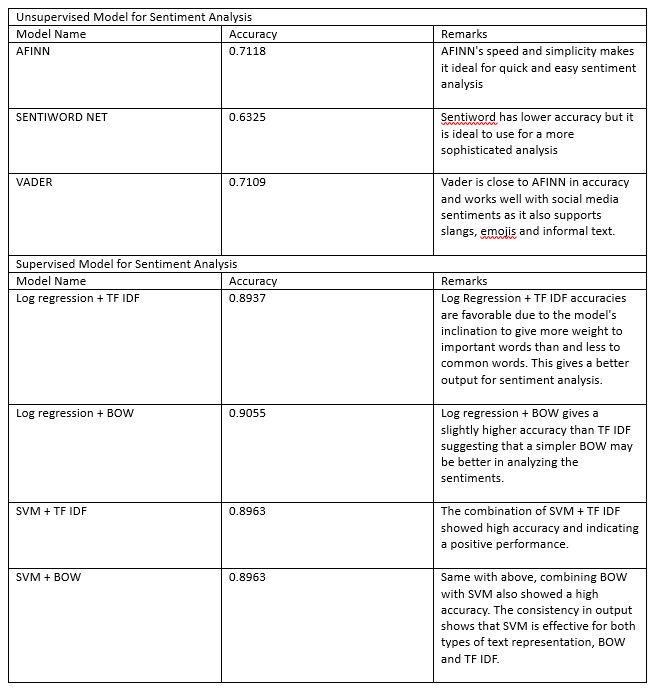

In [ ]:
'''I would recommend AFINN for unsupervised machine learning because of it's high accuracy and speed which would be very helpful in providing quick insights.
For supervised machine learning, I would recommend logistic regression with BOW as this also gave the highest accuracy despite it's simplicity.
In summary, based on the models we ran, the simple models provided a higher accuracy and speed compared to the others, suggesting that competency doesn't always
go to the more technical models.'''

NAMED ENTITY RECOGNITION

In [1]:
text = """Three more countries have joined an “international grand committee” of parliaments, adding to calls for
Facebook’s boss, Mark Zuckerberg, to give evidence on misinformation to the coalition. Brazil, Latvia and Singapore
bring the total to eight different parliaments across the world, with plans to send representatives to London on 27
November with the intention of hearing from Zuckerberg. Since the Cambridge Analytica scandal broke, the Facebook chief
has only appeared in front of two legislatures: the American Senate and House of Representatives, and the European parliament.
Facebook has consistently rebuffed attempts from others, including the UK and Canadian parliaments, to hear from Zuckerberg.
He added that an article in the New York Times on Thursday, in which the paper alleged a pattern of behaviour from Facebook
to “delay, deny and deflect” negative news stories, “raises further questions about how recent data breaches were allegedly
dealt with within Facebook.”
"""
print(text)

Three more countries have joined an “international grand committee” of parliaments, adding to calls for
Facebook’s boss, Mark Zuckerberg, to give evidence on misinformation to the coalition. Brazil, Latvia and Singapore
bring the total to eight different parliaments across the world, with plans to send representatives to London on 27
November with the intention of hearing from Zuckerberg. Since the Cambridge Analytica scandal broke, the Facebook chief
has only appeared in front of two legislatures: the American Senate and House of Representatives, and the European parliament.
Facebook has consistently rebuffed attempts from others, including the UK and Canadian parliaments, to hear from Zuckerberg.
He added that an article in the New York Times on Thursday, in which the paper alleged a pattern of behaviour from Facebook
to “delay, deny and deflect” negative news stories, “raises further questions about how recent data breaches were allegedly
dealt with within Facebook.”



In [2]:
import re

text = re.sub(r'\n', '', text)
text
#this code used regex to remove new line characters and replace them with nothing as specified by ''


'Three more countries have joined an “international grand committee” of parliaments, adding to calls forFacebook’s boss, Mark Zuckerberg, to give evidence on misinformation to the coalition. Brazil, Latvia and Singaporebring the total to eight different parliaments across the world, with plans to send representatives to London on 27November with the intention of hearing from Zuckerberg. Since the Cambridge Analytica scandal broke, the Facebook chiefhas only appeared in front of two legislatures: the American Senate and House of Representatives, and the European parliament.Facebook has consistently rebuffed attempts from others, including the UK and Canadian parliaments, to hear from Zuckerberg.He added that an article in the New York Times on Thursday, in which the paper alleged a pattern of behaviour from Facebookto “delay, deny and deflect” negative news stories, “raises further questions about how recent data breaches were allegedlydealt with within Facebook.”'

In [3]:
import spacy #importing library for NLP

nlp = spacy.load('en_core_web_sm') #importing the model from spacy which will perform pre-processing including tokenization, POS and named entity recognition
text_nlp = nlp(text) #this calls the function on our text and then saves the processed text under text_nlp

In [4]:
from spacy import displacy #importing library for visualization

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True) #this specifies the visualization for the text in text_nlp also ensuring that it will properly displayed in a jupyter notebook.

In [5]:
#Explain ner in your own words
'''NER or named entity recognition is a technique in NLP which focuses on identifying entities. Once entities are identified, it is then categorized
and classified into predefined categories. These process is done to extract structured data from unstructured text. But what is entity? Entity is what we
always talk about and what is referred to in the text like people, places or organizations, etc.'''

## Sentiment Analysis

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
!pip install scikit-learn

In [31]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk
import textblob

from sklearn.base import clone #the clone function creates a deep copy of an estimator with the same estimator which is particularly useful if you want to duplicate an estimator
#while ensuring that the new instance independent of the original one; this is particularly useful if we want to test models using different techniques
from sklearn.preprocessing import label_binarize
from scipy import interpolate #this module provides functions for interpolation which means estimating unknown values falling between known values
from sklearn.metrics import roc_curve, auc #roc_cruve is the graphical representation of the true positive rate vs the false positive rate while AUC refers
#to the area under the curve which provides a single measure of model performance

from nltk.corpus import stopwords
nltk.download('stopwords') #this will ensure that common stopwords are removed

np.set_printoptions(precision=2, linewidth=80)

#the following codes are installing the libraries required for the text processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## upload data set movies_review

In [32]:
dataset = pd.read_csv('movie_reviews.csv') #this line reads the movie reviews csv using panda

In [33]:
dataset
#dataset contains the movie review and the sentiment

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [35]:
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

#the 2 lines converts the reviews and sentiments to numpy arrays which are more appropriate for machine learning tasks



In [36]:
test_reviews = reviews[35000:] #creation of subsets for testing, starting from the 35,000 review until the end
test_sentiments = sentiments[35000:] #creation of subsets for testing, starting from 35,000 sentiment until the end
sample_review_ids = [7626, 3533, 13010] #sample review ids for testing


In [37]:
test_reviews

array(["Just don't bother. I thought I would see a movie with great supspense and action.<br /><br />But it grows boring and terribly predictable after the interesting start. In the middle of the film you have a little social drama and all tension is lost because it slows down the speed. Towards the end the it gets better but not really great. I think the director took this movie just too serious. In such a kind of a movie even if u don't care about the plot at least you want some nice action. I nearly dozed off in the middle/main part of it. Rating 3/10.<br /><br />derboiler.",
       "Be careful with this one. Once you get yer mitts on it, it'll change the way you look at kung-fu flicks. You will be yearning a plot from all of the kung-fu films now, you will be wanting character depth and development, you will be craving mystery and unpredictability, you will demand dynamic camera work and incredible backdrops. Sadly, you won't find all of these aspects together in one kung-fu movie,

In [38]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

#polarity refers to the degree of positivity or negativity of the sentiment or the comment, -1 being negative and 1 as positive

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
Predicted Sentiment polarity: -0.3625
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
Predicted Sentiment polarity: 0.16666666666666674
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
Actual Sentiment: positive
Predicted Sentiment polarity: -0.037239583333333326
------------------------------------------------------------


SENTIMENT ANALYSIS ON BASED OF UNSUPERVISED MODEL

1. AFINN

In [39]:
import nltk

In [40]:
! pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=a0d92df3547277b51ecd142e45f6e04bfeea2fe06e5f31b21e15d9e375559afc
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [41]:
from afinn import Afinn

afn = Afinn(emoticons=True)

#afinn is a lexicon or a collection of words with an associated polarity score for each word. It's the simplest method yet the most popular for sentiment analysis
#the score range is -3.0 to 3.0 with -3.0 as negative and 3.0 as positive and 0.0 as in between

In [42]:
afn = Afinn(emoticons=True)

In [43]:
## test afinn

In [44]:
text ="I love NLP " #this is an example of a positive sentiment

In [45]:
score = afn.score(text)

In [46]:
print(f"Sentiment Score: {score}") #printing the score for the positive sentiment

Sentiment Score: 3.0


In [47]:
text ="I hate NLP " #this is an example of a negative sentiment

In [48]:
score = afn.score(text)

In [49]:
print(f"Sentiment Score: {score}") #printing the score for the negative sentiment

Sentiment Score: -3.0


In [50]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
Predicted Sentiment polarity: -7.0
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
Predicted Sentiment polarity: 3.0
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
Actual Sentiment: positive
Predicted Sentiment polarity: -3.0
------------------------------------------------------------


In [87]:
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels,
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,
                             classes=classes)

In [88]:
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels,
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)

In [90]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

In [54]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments,
                                  classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7118
Precision: 0.7289
Recall: 0.7118
F1 Score: 0.7062

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.67      0.85      0.75      7510
    negative       0.79      0.57      0.67      7490

    accuracy                           0.71     15000
   macro avg       0.73      0.71      0.71     15000
weighted avg       0.73      0.71      0.71     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [59]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

SENTIWORD NET

In [ ]:
#sentiword is also a lexicon. a resource which is used for opinion mining. It assigns to each synset a of wordnet 3 sentiment scores which are positivity, negativity and objectivity.


In [55]:
import nltk

In [56]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [58]:
from nltk.corpus import sentiwordnet as swn #downloading the module for usage

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [60]:
def analyze_sentiment_sentiwordnet_lexicon(review,
                                           verbose=False):

    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in tn.nlp(review)]
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):   #NN stands for Noun
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')): #VB stands for Verb
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')): #JJ stands for Adjective
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')): #RB stands for Adverb
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1

    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score,
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']],
                                                             labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

In [61]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=True)
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [62]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

In [64]:
norm_test_reviews = tn.normalize_corpus(test_reviews)
predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(review, verbose=False) for review in norm_test_reviews]

In [65]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments,
                                  classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.6325
Precision: 0.6786
Recall: 0.6325
F1 Score: 0.6068

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.59      0.89      0.71      7510
    negative       0.77      0.38      0.51      7490

    accuracy                           0.63     15000
   macro avg       0.68      0.63      0.61     15000
weighted avg       0.68      0.63      0.61     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

VADER

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#vader is specializes in polarity of the sentiment as well as the intensity of the emotion

In [67]:
def analyze_sentiment_vader_lexicon(review,
                                    threshold=0.1,
                                    verbose=False):
    # pre-process text
    review = tn.strip_html_tags(review)
    review = tn.remove_accented_chars(review)
    review = tn.expand_contractions(review)

    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']],
                                                              labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

In [68]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [69]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [70]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]

/content/text_normalizer.py:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [71]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments,
                                  classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7109
Precision: 0.7238
Recall: 0.7109
F1 Score: 0.7066

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.67      0.83      0.74      7510
    negative       0.78      0.59      0.67      7490

    accuracy                           0.71     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.71      0.71     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

SUPERVISED MACHINE LEARNING

In [72]:
import nltk

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

In [75]:

dataset = pd.read_csv('movie_reviews.csv')

# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# normalize datasets
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove('not')

norm_train_reviews = tn.normalize_corpus(train_reviews, stopwords=stop_words)
norm_test_reviews = tn.normalize_corpus(test_reviews, stopwords=stop_words)

#stop words removed were no, but and not

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


/content/text_normalizer.py:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [77]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [78]:

print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2090937)  Test features shape: (15000, 2090937)
TFIDF model:> Train features shape: (35000, 2090937)  Test features shape: (15000, 2090937)


In [ ]:
## Model Training

In [79]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [80]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr,
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.9055
Precision: 0.9055
Recall: 0.9055
F1 Score: 0.9055

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.91      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [81]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr,
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8937
Precision: 0.8938
Recall: 0.8937
F1 Score: 0.8937

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.90      0.89      7510
    negative       0.90      0.89      0.89      7490

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [82]:
svm_bow_predictions = meu.train_predict_model(classifier=svm,
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8963
Precision: 0.8964
Recall: 0.8963
F1 Score: 0.8963

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.89      0.90      7510
    negative       0.89      0.91      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [91]:

svm_tfidf_predictions = meu.train_predict_model(classifier=svm,
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8963
Precision: 0.8967
Recall: 0.8963
F1 Score: 0.8962

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.91      0.90      7510
    negative       0.91      0.88      0.89      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [ ]:
#Assume you are Business analyst for Amazon prime. Amazon recently acquired IMBD and now you have access to reviews of movie.
#You need to recommend positively rated movies to customer during holiday season. You are assigned to review code for all
#model build for sentiment analysis. You need select 1 unsupervised model and 1 supervised machine learning model to test in production environment.
#Please provide your recommendation with valid rationale


'''I would recommend AFINN for unsupervised machine learning because of it's high accuracy and speed which would be very helpful in providing quick insights.
For supervised machine learning, I would recommend logistic regression with BOW as this also gave the highest accuracy despite it's simplicity.
In summary, based on the models we ran, the simple models provided a higher accuracy and speed compared to the others, suggesting that competency doesn't always
go to the more technical models.'''
